In [ ]:
# started 10-15-2025
# https://imbalancedlearningregression.readthedocs.io/en/latest/intro.html
# Branco, P., Torgo, L., Ribeiro, R. (2017). SMOGN: A Pre-Processing Approach for
#  Imbalanced Regression. Proceedings of Machine Learning Research, 74:36-50.
# http://proceedings.mlr.press/v74/branco17a/branco17a.pdf

In [108]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
fires = pd.read_csv("../topo/fires_with_slope.csv")

In [110]:
fires.head()

,OBJECTID,FIRE_YEAR,DISCOVERY_DATE,FIRE_SIZE,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,OBJECTID.1,temp_max_F,humidity_pct,precip_in,windspeed_mph,time,ndvi,pop_density,slope
0,110,2005,2453540.5,10.0,Equipment Use,33.718889,-117.433611,110,73.04,89,0.062992,6.028589,1970-01-01 00:00:00.002453540,5016.0,1631.960938,543.52300
1,155,2005,2453411.5,3.0,Debris Burning,34.748333,-119.410278,155,58.46,79,0.000000,4.536979,1970-01-01 00:00:00.002453411,3357.0,0.696928,1002.20950
2,178,2005,2453544.5,4.2,Equipment Use,34.466667,-119.828333,178,77.54,76,0.000000,15.972654,1970-01-01 00:00:00.002453544,4356.0,24.228647,102.41041
3,1053,2005,2453559.5,3.0,Miscellaneous,34.479444,-118.768611,1053,82.76,86,0.000000,6.028589,1970-01-01 00:00:00.002453559,3124.0,0.044615,335.07693
4,1282,2005,2453582.5,2.0,Lightning,33.110833,-116.847222,1282,87.62,88,0.000000,8.763207,1970-01-01 00:00:00.002453582,4180.0,0.154729,337.52570


In [111]:
fires.columns

Index(['OBJECTID', 'FIRE_YEAR', 'DISCOVERY_DATE', 'FIRE_SIZE',
       'STAT_CAUSE_DESCR', 'LATITUDE', 'LONGITUDE', 'OBJECTID.1', 'temp_max_F',
       'humidity_pct', 'precip_in', 'windspeed_mph', 'time', 'ndvi',
       'pop_density', 'slope'],
      dtype='object')

In [112]:
fires = fires[["FIRE_YEAR","FIRE_SIZE","LATITUDE","LONGITUDE","temp_max_F","humidity_pct","precip_in","windspeed_mph","ndvi","pop_density","slope"]]

In [113]:
fires.describe()

,FIRE_YEAR,FIRE_SIZE,LATITUDE,LONGITUDE,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi,pop_density,slope
count,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2925.000000,2926.000000,2926.000000
mean,2009.356801,698.459740,33.847226,-117.369907,83.949132,68.571770,0.003938,8.036604,3166.863248,261.331656,624.748551
std,3.011743,8030.910191,0.616454,0.966675,11.231815,19.486523,0.020734,2.537002,1137.025054,652.147650,416.513490
min,2005.000000,2.000000,32.552700,-120.574722,43.340000,9.000000,0.000000,2.548167,-3000.000000,0.000000,-70.337070
25%,2007.000000,3.000000,33.521111,-117.776414,76.820000,54.000000,0.000000,6.401492,2331.000000,0.454851,340.791967
50%,2009.000000,6.300000,33.896111,-117.182678,85.100000,71.000000,0.000000,7.551274,3020.000000,13.918338,543.042900
75%,2012.000000,32.000000,34.311111,-116.862188,91.940000,85.000000,0.000000,9.058421,3923.000000,133.882072,860.807860
max,2015.000000,240207.000000,35.000000,-114.203000,118.400000,100.000000,0.551181,28.589186,6407.000000,8307.394531,3008.082800


In [114]:
fires.isna().sum()


FIRE_YEAR        0
FIRE_SIZE        0
LATITUDE         0
LONGITUDE        0
temp_max_F       0
humidity_pct     0
precip_in        0
windspeed_mph    0
ndvi             1
pop_density      0
slope            0
dtype: int64

In [115]:
fires = fires.dropna()

In [116]:
fires.describe()

,FIRE_YEAR,FIRE_SIZE,LATITUDE,LONGITUDE,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi,pop_density,slope
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,2009.355214,698.691350,33.847033,-117.369049,83.950462,68.572991,0.003940,8.033466,3166.863248,261.397005,624.958352
std,3.011034,8032.273574,0.616471,0.965727,11.233505,19.489743,0.020737,2.531750,1137.025054,652.249575,416.430044
min,2005.000000,2.000000,32.552700,-120.574722,43.340000,9.000000,0.000000,2.548167,-3000.000000,0.000000,-70.337070
25%,2007.000000,3.000000,33.521111,-117.775556,76.820000,54.000000,0.000000,6.401492,2331.000000,0.454457,340.933620
50%,2009.000000,6.300000,33.896111,-117.182300,85.100000,71.000000,0.000000,7.520199,3020.000000,13.883450,543.042900
75%,2012.000000,32.000000,34.311111,-116.862001,91.940000,85.000000,0.000000,9.011809,3923.000000,133.941040,860.811500
max,2015.000000,240207.000000,35.000000,-114.203000,118.400000,100.000000,0.551181,28.589186,6407.000000,8307.394531,3008.082800


In [117]:
fires.shape

(2925, 11)

In [118]:
fires["sacrifice"] = 2

In [119]:
fires.head()

,FIRE_YEAR,FIRE_SIZE,LATITUDE,LONGITUDE,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi,pop_density,slope,sacrifice
0,2005,10.0,33.718889,-117.433611,73.04,89,0.062992,6.028589,5016.0,1631.960938,543.52300,2
1,2005,3.0,34.748333,-119.410278,58.46,79,0.000000,4.536979,3357.0,0.696928,1002.20950,2
2,2005,4.2,34.466667,-119.828333,77.54,76,0.000000,15.972654,4356.0,24.228647,102.41041,2
3,2005,3.0,34.479444,-118.768611,82.76,86,0.000000,6.028589,3124.0,0.044615,335.07693,2
4,2005,2.0,33.110833,-116.847222,87.62,88,0.000000,8.763207,4180.0,0.154729,337.52570,2


In [120]:
fires.iloc[1000, fires.columns.get_loc("sacrifice")] = np.nan

In [121]:
fires.describe()

,FIRE_YEAR,FIRE_SIZE,LATITUDE,LONGITUDE,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi,pop_density,slope,sacrifice
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2924.0
mean,2009.355214,698.691350,33.847033,-117.369049,83.950462,68.572991,0.003940,8.033466,3166.863248,261.397005,624.958352,2.0
std,3.011034,8032.273574,0.616471,0.965727,11.233505,19.489743,0.020737,2.531750,1137.025054,652.249575,416.430044,0.0
min,2005.000000,2.000000,32.552700,-120.574722,43.340000,9.000000,0.000000,2.548167,-3000.000000,0.000000,-70.337070,2.0
25%,2007.000000,3.000000,33.521111,-117.775556,76.820000,54.000000,0.000000,6.401492,2331.000000,0.454457,340.933620,2.0
50%,2009.000000,6.300000,33.896111,-117.182300,85.100000,71.000000,0.000000,7.520199,3020.000000,13.883450,543.042900,2.0
75%,2012.000000,32.000000,34.311111,-116.862001,91.940000,85.000000,0.000000,9.011809,3923.000000,133.941040,860.811500,2.0
max,2015.000000,240207.000000,35.000000,-114.203000,118.400000,100.000000,0.551181,28.589186,6407.000000,8307.394531,3008.082800,2.0


<Axes: xlabel='FIRE_SIZE', ylabel='Count'>

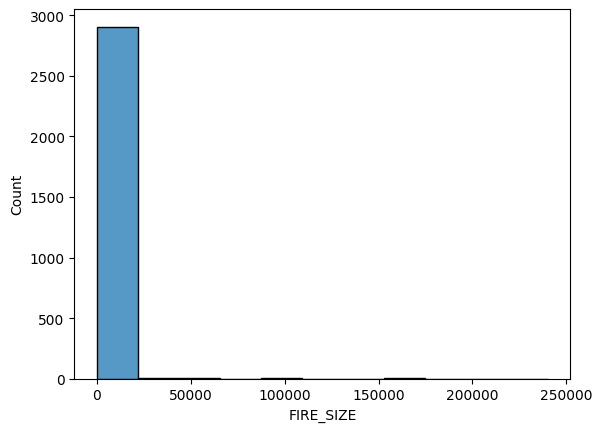

In [122]:
sns.histplot(data=fires["FIRE_SIZE"], bins=11, kde=False)

<Axes: xlabel='FIRE_SIZE', ylabel='Count'>

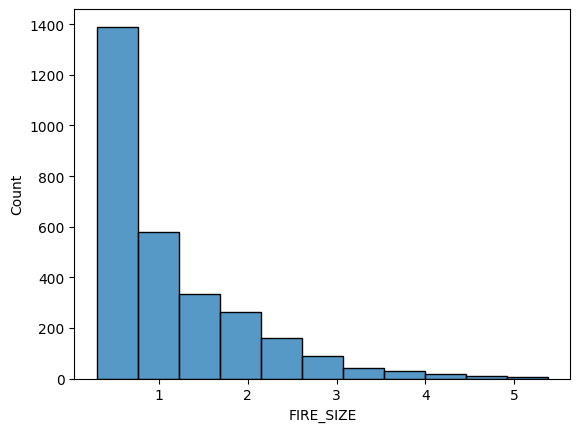

In [123]:
sns.histplot(data=np.log10(fires["FIRE_SIZE"]), bins=11, kde=False)

In [124]:
fires.describe()

,FIRE_YEAR,FIRE_SIZE,LATITUDE,LONGITUDE,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi,pop_density,slope,sacrifice
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2924.0
mean,2009.355214,698.691350,33.847033,-117.369049,83.950462,68.572991,0.003940,8.033466,3166.863248,261.397005,624.958352,2.0
std,3.011034,8032.273574,0.616471,0.965727,11.233505,19.489743,0.020737,2.531750,1137.025054,652.249575,416.430044,0.0
min,2005.000000,2.000000,32.552700,-120.574722,43.340000,9.000000,0.000000,2.548167,-3000.000000,0.000000,-70.337070,2.0
25%,2007.000000,3.000000,33.521111,-117.775556,76.820000,54.000000,0.000000,6.401492,2331.000000,0.454457,340.933620,2.0
50%,2009.000000,6.300000,33.896111,-117.182300,85.100000,71.000000,0.000000,7.520199,3020.000000,13.883450,543.042900,2.0
75%,2012.000000,32.000000,34.311111,-116.862001,91.940000,85.000000,0.000000,9.011809,3923.000000,133.941040,860.811500,2.0
max,2015.000000,240207.000000,35.000000,-114.203000,118.400000,100.000000,0.551181,28.589186,6407.000000,8307.394531,3008.082800,2.0


In [125]:
fires = fires.reset_index(drop=True)

In [126]:
import ImbalancedLearningRegression as iblr
from ImbalancedLearningRegression import ro # random oversampling, duplicates examples
import smogn


In [127]:
# random oversampling
fires_ro = ro(data=fires, y="FIRE_SIZE")
#iblr.ro(data = fires, y = "FIRE_SIZE")


r_index:   0%|          | 0/805 [00:00<?, ?it/s]

r_index: 100%|##########| 805/805 [00:00<00:00, 6874.75it/s]


In [153]:
fires_smogn = smogn.smoter(
    data=fires,
    y="FIRE_SIZE"
    #samp_method="balance_extreme",
    #rel_xtrm_type="high"
)

#samp method - balance balances out the majority/minority, extreme only focuses on minority, balance_extreme does a mix
# rel means "relevance" or examples that qualify as rare/minority
# each examples is given a rel score from 0(not rare) to 1 (minority)
# set relevance threshold - lower thres means more are classified as rare and will be oversampled
# rel_xtrm_trype = high - only focus on oversampling the high fire sizes



dist_matrix:   0%|          | 0/657 [00:00<?, ?it/s]

r_index: 100%|##########| 148/148 [00:00<00:00, 1182.36it/s]


In [154]:
fires_ro.head() # it works!

,FIRE_YEAR,FIRE_SIZE,LATITUDE,LONGITUDE,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi,pop_density,slope
0,2008.0,41.0,33.404800,-115.710000,77.00,67.0,0.0,5.966439,819.0,0.051225,-45.040108
1,2010.0,41.6,34.173461,-118.848247,89.78,84.0,0.0,5.034183,3521.0,634.371094,261.261300
2,2007.0,42.0,33.818056,-117.368889,60.08,59.0,0.0,4.847732,2805.0,114.371422,603.877260
3,2009.0,42.0,33.919506,-117.103765,93.38,68.0,0.0,7.022996,2470.0,4.845819,485.888150
4,2009.0,42.0,34.800278,-119.020833,64.94,67.0,0.0,6.774394,4365.0,1.306148,1634.999800


In [155]:
fires_smogn.head()

,FIRE_YEAR,FIRE_SIZE,LATITUDE,LONGITUDE,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi,pop_density,slope
0,2008.0,60.026144,33.120652,-115.470841,76.122085,66.0,0.000000,7.709415,925.894234,0.030405,0.000000
1,2009.0,45.414847,34.160982,-118.759623,89.364895,81.0,0.000000,5.090490,3507.904432,653.045072,264.541299
2,2007.0,59.154930,33.961713,-117.219707,80.965517,60.0,0.000000,7.560573,2701.124940,62.490938,608.347391
3,2008.0,56.220472,33.920497,-117.098855,91.666924,68.0,0.000000,6.765826,2470.000000,2.840684,516.297300
4,2009.0,51.333333,34.508497,-118.088987,80.392702,55.0,0.004306,6.366584,4531.775450,0.591940,1458.844625


In [156]:
fires.describe()

,FIRE_YEAR,FIRE_SIZE,LATITUDE,LONGITUDE,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi,pop_density,slope,sacrifice
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2924.0
mean,2009.355214,698.691350,33.847033,-117.369049,83.950462,68.572991,0.003940,8.033466,3166.863248,261.397005,624.958352,2.0
std,3.011034,8032.273574,0.616471,0.965727,11.233505,19.489743,0.020737,2.531750,1137.025054,652.249575,416.430044,0.0
min,2005.000000,2.000000,32.552700,-120.574722,43.340000,9.000000,0.000000,2.548167,-3000.000000,0.000000,-70.337070,2.0
25%,2007.000000,3.000000,33.521111,-117.775556,76.820000,54.000000,0.000000,6.401492,2331.000000,0.454457,340.933620,2.0
50%,2009.000000,6.300000,33.896111,-117.182300,85.100000,71.000000,0.000000,7.520199,3020.000000,13.883450,543.042900,2.0
75%,2012.000000,32.000000,34.311111,-116.862001,91.940000,85.000000,0.000000,9.011809,3923.000000,133.941040,860.811500,2.0
max,2015.000000,240207.000000,35.000000,-114.203000,118.400000,100.000000,0.551181,28.589186,6407.000000,8307.394531,3008.082800,2.0


In [157]:
fires_ro.describe()

,FIRE_YEAR,FIRE_SIZE,LATITUDE,LONGITUDE,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi,pop_density,slope
count,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000,3730.000000
mean,2009.321716,1092.741399,33.859606,-117.373172,84.253035,67.449598,0.003581,8.135105,3194.784182,247.451293,635.208622
std,3.043615,9459.245544,0.624288,1.013758,11.144158,19.833681,0.019177,2.621530,1162.920881,643.192324,424.853849
min,2005.000000,2.000000,32.552700,-120.574722,43.340000,9.000000,0.000000,2.548167,-3000.000000,0.000000,-70.337070
25%,2006.000000,3.500000,33.519826,-117.864444,77.000000,53.000000,0.000000,6.463642,2331.000000,0.310973,337.908505
50%,2009.000000,14.000000,33.908889,-117.178887,85.280000,69.000000,0.000000,7.582349,3057.000000,10.524492,559.114700
75%,2012.000000,100.000000,34.331944,-116.850069,92.120000,84.000000,0.000000,9.198260,3959.000000,111.663427,880.003275
max,2015.000000,240207.000000,35.000000,-114.203000,118.400000,100.000000,0.551181,28.589186,6407.000000,8307.394531,3008.082800


In [158]:
fires_smogn.describe() # it dropped a lot of the small fire rows, compare the 50% of this to the regular one

,FIRE_YEAR,FIRE_SIZE,LATITUDE,LONGITUDE,temp_max_F,humidity_pct,precip_in,windspeed_mph,ndvi,pop_density,slope
count,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000
mean,2009.228836,1921.004049,33.887747,-117.395677,84.732663,66.338624,0.003621,8.168879,3216.703757,214.656759,651.713611
std,2.862550,13114.965686,0.606454,0.994762,10.167436,18.787507,0.020709,2.454898,1174.483610,589.759968,423.244398
min,2005.000000,2.000000,32.552700,-120.574722,43.520000,11.000000,0.000000,2.548167,-3000.000000,0.000000,-70.337070
25%,2007.000000,8.000000,33.533790,-118.011148,78.440000,53.000000,0.000000,6.650093,2359.673615,0.568079,348.728845
50%,2009.000000,75.000000,33.927302,-117.219081,85.460000,67.000000,0.000000,7.682434,3073.678352,9.791229,584.171361
75%,2011.000000,230.250000,34.336932,-116.871789,91.760000,82.000000,0.000000,9.198260,4078.796855,76.853848,902.724540
max,2015.000000,240207.000000,34.991878,-114.203000,118.400000,100.000000,0.551181,20.758235,6407.000000,4998.376465,2481.707300


In [159]:
# for some reason it doesnt make synthetic data if there are no missing values. if i dropna, then it throws an error. when it does work, the col
# with the missing value (ndvi) gets dropped
# it works now!, had to make new col called sacrifce with 1 missing value so that one gets dropped, added 805 more rows

<Axes: xlabel='FIRE_SIZE', ylabel='Count'>

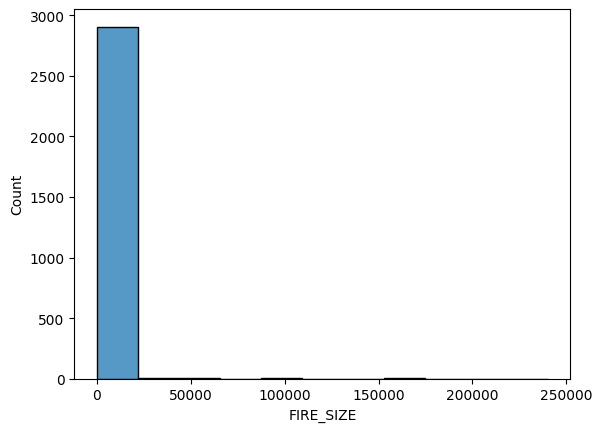

In [160]:
sns.histplot(data=fires["FIRE_SIZE"], bins=11, kde=False)

<Axes: xlabel='FIRE_SIZE', ylabel='Count'>

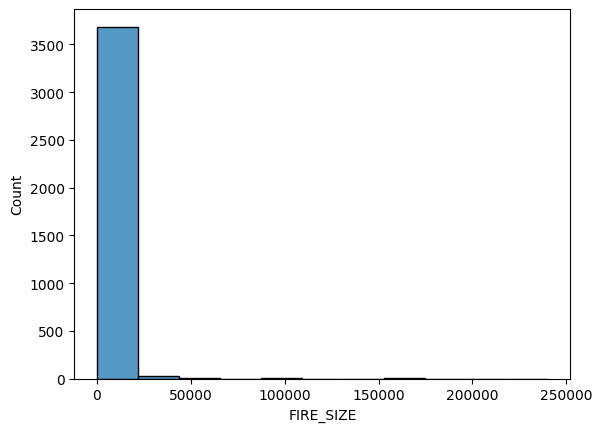

In [161]:
sns.histplot(data=fires_ro["FIRE_SIZE"], bins=11, kde=False)

<Axes: xlabel='FIRE_SIZE', ylabel='Count'>

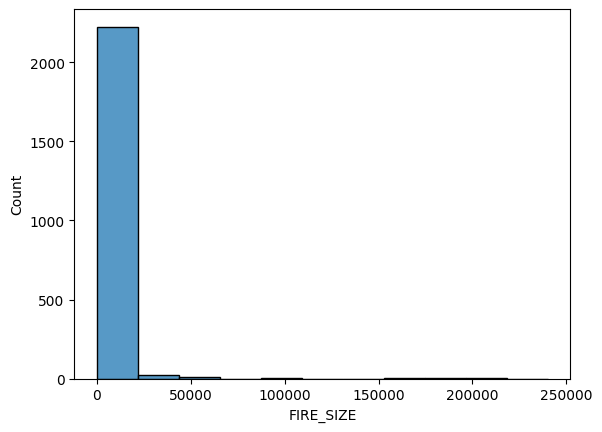

In [162]:
sns.histplot(data=fires_smogn["FIRE_SIZE"], bins=11, kde=False)

In [163]:
num_rows_reg = (fires["FIRE_SIZE"] > 1000).sum()
num_rows_reg

np.int64(119)

In [164]:
num_rows_ro = (fires_ro["FIRE_SIZE"] > 1000).sum()
num_rows_ro
# 150 more synthetic fires, we can't overdo this or else 1. most of the large fire data will be fake and 2. itll overfit to the few large fires.

np.int64(280)

In [165]:
num_rows_smogn = (fires_smogn["FIRE_SIZE"] > 1000).sum()
num_rows_smogn
# around 140 more synthetic fires. safer to overdo because smogn resists overfitting better than ro

np.int64(264)

In [166]:
##  ONE WAY TO TELL THE DIFFERECE BETWEEN ORIGINAL AND SYNTHETIC (SMOGN) FIRES IS THE DECIMAL. for large fires, i think the labelers didn't add decimals.
##      smogn has decimals bc it adds noise

<Axes: xlabel='FIRE_SIZE', ylabel='Count'>

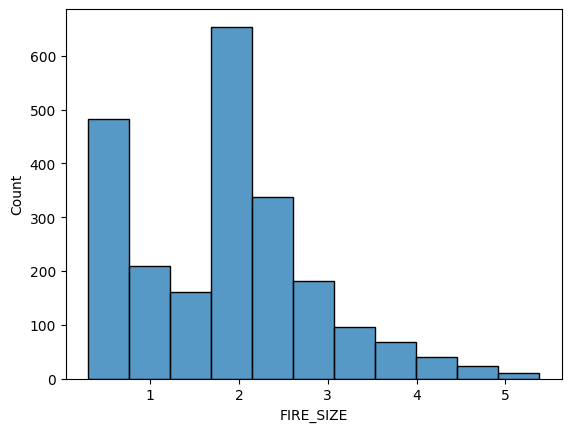

In [167]:
sns.histplot(data=np.log10(fires_smogn["FIRE_SIZE"]), bins=11, kde=False)

In [168]:
fires_smogn.to_csv("fires_smogn.csv", index=False)

In [169]:
print(np.isinf(fires_smogn).sum())

FIRE_YEAR        0
FIRE_SIZE        0
LATITUDE         0
LONGITUDE        0
temp_max_F       0
humidity_pct     0
precip_in        0
windspeed_mph    0
ndvi             0
pop_density      0
slope            0
dtype: int64


In [170]:
(fires_smogn["FIRE_SIZE"] <= 0).sum()
# if this number is greater than 0, then error will occur during feature engineering
#   cannot take log of 0 or negative num, so NaNs will spread through the model parameters


np.int64(0)